In [71]:
import numpy as np
import pandas as pd
import sys
import os
from pathlib import Path

cwd = os.getcwd()
# print(f"Working dir: {cwd}")
module_path = os.path.abspath(Path(cwd).parents[1])
# print(f"Module dir: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.tools.utils import load_yaml, load_json
import seaborn as sns

sns.set(font_scale=1.2)
sns.set_palette("Set2")

In [95]:
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 20
    
plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [72]:
Path(os.path.join(module_path, "reports", "figures", "comparison_of_all")).mkdir(parents=True, exist_ok=True)   # create dir to save figures

## Load metrics

#### Stardist trained on raw

In [5]:
metrics_star = load_json(os.path.join(module_path, "notebooks", "results", "Stardist", "trained_on_raw", "metrics", "exp11_best_metrics.json"))
metrics_star["Algorithm"] = "Stardist (trained on raw)"

In [42]:
metrics_star_surf = pd.read_csv(os.path.join(module_path, "notebooks", "results", "Stardist", "trained_on_raw", "metrics", "exp11_distance_metrics_df.csv"))

#### Thresholded seeded local minima Watershed

In [43]:
metrics_wt = load_json(os.path.join(module_path, "notebooks", "results", "Simple_Watershed", "metrics", "exp16_metrics.json"))
metrics_wt["Algorithm"] = "Local Min Seeded WT"
metrics_wt_surf = pd.read_csv(os.path.join(module_path, "notebooks", "results", "Simple_Watershed", "metrics", "exp16_distance_metrics_df.csv"))

#### StarDist prediction used as seeds for Watershed

In [45]:
metrics_star_wt = load_json(os.path.join(module_path, "notebooks", "results", "Simple_Watershed", "metrics", "exp17_metrics.json"))
metrics_star_wt["Algorithm"] = "StarDist WT"
metrics_star_wt_surf = pd.read_csv(os.path.join(module_path, "notebooks", "results", "Simple_Watershed", "metrics", "exp17_distance_metrics_df.csv"))

#### Vollseg

In [46]:
metrics_voll = load_json(os.path.join(module_path, "notebooks", "results", "vollseg", "exp02_metrics.json"))
metrics_voll["Algorithm"] = "Vollseg (pretrained)"
metrics_voll_surf = pd.read_csv(os.path.join(module_path, "notebooks", "results", "vollseg", "exp02_distance_metrics_df.csv"))

#### Plantseg

In [47]:
metrics_plant = load_json(os.path.join(module_path, "notebooks", "results", "plantseg", "metrics", "best_pred_metrics.json"))
metrics_plant["Algorithm"] = "Plantseg (custom)"
metrics_plant_surf = pd.read_csv(os.path.join(module_path, "notebooks", "results", "plantseg", "metrics", "best_pred_distance_metrics_df.csv"))

#### Stardist + APOC prob maps

In [48]:
metrics_star_apoc = load_json(os.path.join(module_path, "notebooks", "results", "Stardist", "trained_on_pmaps", "metrics", "exp12_metrics_best.json"))
metrics_star_apoc["Algorithm"] = "Stardist + APOC"
metrics_star_apoc_surf = pd.read_csv(os.path.join(module_path, "notebooks", "results", "Stardist", "trained_on_pmaps", "metrics", "exp12-4_distance_metrics_df.csv"))

## Put all to one Dataframe

In [35]:
metrics = pd.concat([pd.DataFrame(metrics_star, index = ["Stardist (trained on raw)"]), pd.DataFrame(metrics_wt, index = ["Local Min Seeded WT"]),  pd.DataFrame(metrics_star_wt, index = ["StarDist+APOC+WT"]), pd.DataFrame(metrics_star_apoc, index = ["StarDist+APOC"]), pd.DataFrame(metrics_voll, index = ["Vollseg (pretrained)"]), pd.DataFrame(metrics_plant, index = ["PlantSeg (custom)"])])
metrics

,Mean distance from the GT to predicted surface in microns,Mean distance from predicted to the GT surface in microns,Mean Hausdorff95 distance,Mean surface overlap fraction of GT surfaces with predicted surfaces,Mean surface overlap fraction of the predicted surfaces with the GT surfaces,Mean surface DSC,Mean volume DSC over matched objects,tp,fn,fp,precision,recall,accuracy,f1,mean_true_score,mean_matched_score,panoptic_quality,Algorithm
Stardist (trained on raw),0.633174,0.361907,2.161289,0.660110,0.791349,0.716446,0.870704,362,0,29,0.925831,1.000000,0.925831,0.961487,0.791743,0.791743,0.761251,Stardist (trained on raw)
Local Min Seeded WT,0.503010,0.404890,1.455244,0.703077,0.803772,0.747952,0.867087,362,0,120,0.751037,1.000000,0.751037,0.857820,0.769906,0.769906,0.660441,Local Min Seeded WT
StarDist+APOC+WT,0.320882,0.300880,1.008245,0.847787,0.884987,0.864561,0.912785,362,0,7,0.981030,1.000000,0.981030,0.990424,0.841231,0.841231,0.833176,StarDist WT
StarDist+APOC,0.571278,0.341606,1.940047,0.693093,0.811771,0.745004,0.879453,362,0,7,0.981030,1.000000,0.981030,0.990424,0.788743,0.788743,0.781190,Stardist + APOC
Vollseg (pretrained),0.572320,3.593984,11.869509,0.526450,0.469753,0.483189,0.763112,273,89,65,0.807692,0.754144,0.639344,0.780000,0.475109,0.629999,0.491399,Vollseg
PlantSeg (custom),0.576983,1.539591,6.780281,0.653368,0.551705,0.595355,0.845630,352,10,30,0.921466,0.972376,0.897959,0.946237,0.717112,0.737485,0.697835,Plantseg (custom)


In [38]:
metrics["Rank"] = metrics[["recall","accuracy", "f1", "mean_true_score", "Mean surface overlap fraction of GT surfaces with predicted surfaces", "Mean surface DSC", "Mean volume DSC over matched objects", "panoptic_quality"]].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

final = metrics.sort_values("Rank")
metrics.sort_values("Rank")

,Mean distance from the GT to predicted surface in microns,Mean distance from predicted to the GT surface in microns,Mean Hausdorff95 distance,Mean surface overlap fraction of GT surfaces with predicted surfaces,Mean surface overlap fraction of the predicted surfaces with the GT surfaces,Mean surface DSC,Mean volume DSC over matched objects,tp,fn,fp,precision,recall,accuracy,f1,mean_true_score,mean_matched_score,panoptic_quality,Algorithm,Rank
StarDist+APOC+WT,0.320882,0.300880,1.008245,0.847787,0.884987,0.864561,0.912785,362,0,7,0.981030,1.000000,0.981030,0.990424,0.841231,0.841231,0.833176,StarDist WT,1
StarDist+APOC,0.571278,0.341606,1.940047,0.693093,0.811771,0.745004,0.879453,362,0,7,0.981030,1.000000,0.981030,0.990424,0.788743,0.788743,0.781190,Stardist + APOC,2
Stardist (trained on raw),0.633174,0.361907,2.161289,0.660110,0.791349,0.716446,0.870704,362,0,29,0.925831,1.000000,0.925831,0.961487,0.791743,0.791743,0.761251,Stardist (trained on raw),3
Local Min Seeded WT,0.503010,0.404890,1.455244,0.703077,0.803772,0.747952,0.867087,362,0,120,0.751037,1.000000,0.751037,0.857820,0.769906,0.769906,0.660441,Local Min Seeded WT,4
PlantSeg (custom),0.576983,1.539591,6.780281,0.653368,0.551705,0.595355,0.845630,352,10,30,0.921466,0.972376,0.897959,0.946237,0.717112,0.737485,0.697835,Plantseg (custom),5
Vollseg (pretrained),0.572320,3.593984,11.869509,0.526450,0.469753,0.483189,0.763112,273,89,65,0.807692,0.754144,0.639344,0.780000,0.475109,0.629999,0.491399,Vollseg,6


In [118]:
df2 = final.filter(['Mean distance from the GT to predicted surface in microns','Mean Hausdorff95 distance', "Mean surface DSC","Mean volume DSC over matched objects", "precision", "recall", "accuracy","f1", "mean_matched_score", "panoptic_quality"], axis=1)

In [119]:
df2

,Mean distance from the GT to predicted surface in microns,Mean Hausdorff95 distance,Mean surface DSC,Mean volume DSC over matched objects,precision,recall,accuracy,f1,mean_matched_score,panoptic_quality
StarDist+APOC+WT,0.320882,1.008245,0.864561,0.912785,0.981030,1.000000,0.981030,0.990424,0.841231,0.833176
StarDist+APOC,0.571278,1.940047,0.745004,0.879453,0.981030,1.000000,0.981030,0.990424,0.788743,0.781190
Stardist (trained on raw),0.633174,2.161289,0.716446,0.870704,0.925831,1.000000,0.925831,0.961487,0.791743,0.761251
Local Min Seeded WT,0.503010,1.455244,0.747952,0.867087,0.751037,1.000000,0.751037,0.857820,0.769906,0.660441
PlantSeg (custom),0.576983,6.780281,0.595355,0.845630,0.921466,0.972376,0.897959,0.946237,0.737485,0.697835
Vollseg (pretrained),0.572320,11.869509,0.483189,0.763112,0.807692,0.754144,0.639344,0.780000,0.629999,0.491399


In [122]:
print(df2.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Mean distance from the GT to predicted surface in microns &  Mean Hausdorff95 distance &  Mean surface DSC &  Mean volume DSC over matched objects &  precision &    recall &  accuracy &        f1 &  mean\_matched\_score &  panoptic\_quality \\
\midrule
StarDist+APOC+WT          &                                           0.320882 &                   1.008245 &          0.864561 &                              0.912785 &   0.981030 &  1.000000 &  0.981030 &  0.990424 &            0.841231 &          0.833176 \\
StarDist+APOC             &                                           0.571278 &                   1.940047 &          0.745004 &                              0.879453 &   0.981030 &  1.000000 &  0.981030 &  0.990424 &            0.788743 &          0.781190 \\
Stardist (trained on raw) &                                           0.633174 &                   2.161289 &          0.716446 &                              0.870704 &   0.92583

216049689.py (1): In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [50]:
alldf = pd.concat([metrics_star_apoc_surf, metrics_plant_surf, metrics_voll_surf, metrics_star_wt_surf, metrics_wt_surf, metrics_star_surf], axis = 1)

In [51]:
alldf

,Unnamed: 0,avrg_d_from_gt_to_pred,avrg_d_from_pred_to_gt,HD95,surf_overlap_of_gt_surf_w_pred_surf,surf_overlap_of_pred_surf_w_gt_surf,DSCsurf,DSCvol,Unnamed: 0,avrg_d_from_gt_to_pred,...,DSCsurf,DSCvol,Unnamed: 0,avrg_d_from_gt_to_pred,avrg_d_from_pred_to_gt,HD95,surf_overlap_of_gt_surf_w_pred_surf,surf_overlap_of_pred_surf_w_gt_surf,DSCsurf,DSCvol
0,0,0.366800,0.243257,1.235467,0.790725,0.903734,0.841886,0.905605,0.0,0.584106,...,0.520162,0.842221,0,0.424167,0.249840,1.730000,0.777267,0.899127,0.832261,0.899049
1,1,0.412709,0.309009,1.394771,0.746595,0.836003,0.787826,0.893628,1.0,0.565726,...,0.611785,0.853356,1,0.357457,0.265120,1.160519,0.772908,0.872852,0.818499,0.906777
2,2,0.247406,0.207195,0.692000,0.902274,0.957227,0.928077,0.930349,2.0,0.578271,...,0.617415,0.852102,2,0.247887,0.197689,0.692000,0.890581,0.966809,0.925751,0.930826
3,3,0.230834,0.197987,0.692000,0.904644,0.955267,0.928283,0.934158,3.0,0.540441,...,0.672104,0.861012,3,0.249974,0.213328,0.773680,0.864262,0.918907,0.889800,0.928409
4,4,0.389204,0.234395,1.527895,0.791970,0.918670,0.848958,0.907189,4.0,0.644952,...,0.547312,0.844504,4,0.408950,0.242868,1.604336,0.778830,0.906755,0.835986,0.904389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,357,0.955969,0.341009,3.960151,0.561569,0.793579,0.653507,0.807153,NaN,NaN,...,0.736820,0.835225,357,1.354781,0.342057,5.538702,0.512343,0.806105,0.621440,0.775890
358,358,0.540582,0.420979,1.498224,0.580634,0.690579,0.629395,0.868902,NaN,NaN,...,0.651272,0.869723,358,0.553255,0.391461,1.839015,0.624864,0.740097,0.676060,0.874042
359,359,0.436602,0.357662,1.107740,0.663973,0.766034,0.710309,0.889599,NaN,NaN,...,0.665318,0.864244,359,0.449979,0.365057,1.121168,0.668716,0.777173,0.717773,0.886897
360,360,0.813155,0.682097,1.738628,0.355588,0.446856,0.395138,0.773955,NaN,NaN,...,0.647671,0.850505,360,0.630032,0.500831,1.557000,0.505759,0.606751,0.550424,0.828949


## Plots

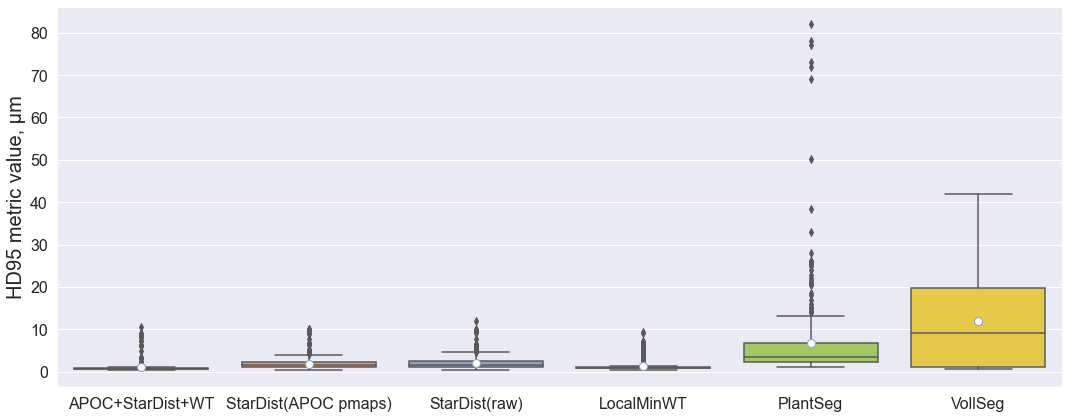

In [116]:
f, ax = plt.subplots(1, figsize = (18,7))

sns.boxplot(data=[metrics_star_wt_surf["HD95"], 
                  metrics_star_apoc_surf["HD95"], 
                  metrics_star_surf["HD95"],  
                  metrics_wt_surf["HD95"], 
                  metrics_plant_surf["HD95"],
                  metrics_voll_surf["HD95"]], 
            showmeans=True, ax = ax,meanprops={"marker":"o",
                                               "markerfacecolor":"white", 
                                               "markersize":"8"})

plt.xticks(plt.xticks()[0], ["APOC+StarDist+WT", "StarDist(APOC pmaps)", "StarDist(raw)",   "LocalMinWT", "PlantSeg", "VollSeg"])
plt.ylabel("HD95 metric value, μm")

plt.savefig(os.path.join(module_path, "reports", "figures", "comparison_of_all", "HD95_metrics.png"), bbox_inches='tight')

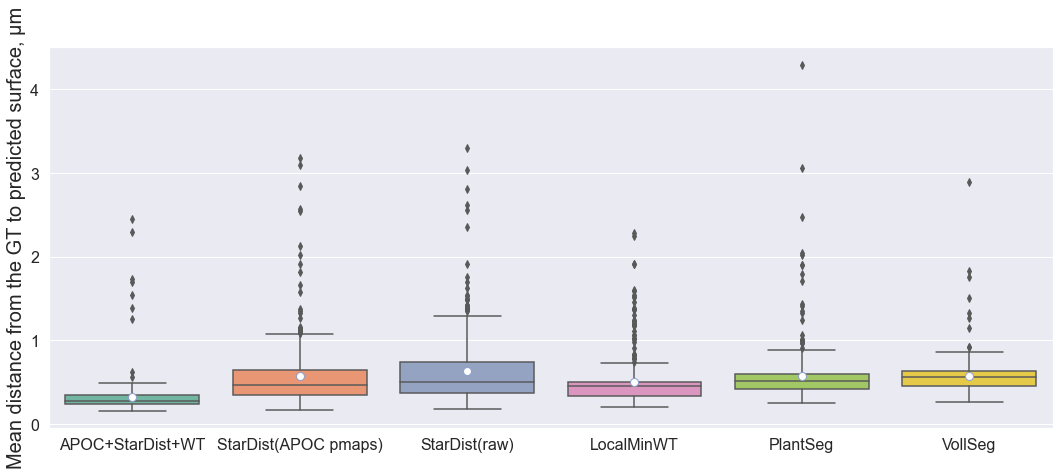

In [115]:
f, ax = plt.subplots(1, figsize = (18,7))

sns.boxplot(data=[metrics_star_wt_surf["avrg_d_from_gt_to_pred"], 
                  metrics_star_apoc_surf["avrg_d_from_gt_to_pred"], 
                  metrics_star_surf["avrg_d_from_gt_to_pred"],  
                  metrics_wt_surf["avrg_d_from_gt_to_pred"], 
                  metrics_plant_surf["avrg_d_from_gt_to_pred"],
                  metrics_voll_surf["avrg_d_from_gt_to_pred"]], 
            showmeans=True, ax = ax,meanprops={"marker":"o",
                                               "markerfacecolor":"white", 
                                               "markersize":"8"})

plt.xticks(plt.xticks()[0], ["APOC+StarDist+WT", "StarDist(APOC pmaps)", "StarDist(raw)",   "LocalMinWT", "PlantSeg", "VollSeg"])
plt.ylabel("Mean distance from the GT to predicted surface, μm")

plt.savefig(os.path.join(module_path, "reports", "figures", "comparison_of_all", "avrg_d_from_gt_to_pred_metrics.png"), bbox_inches='tight')

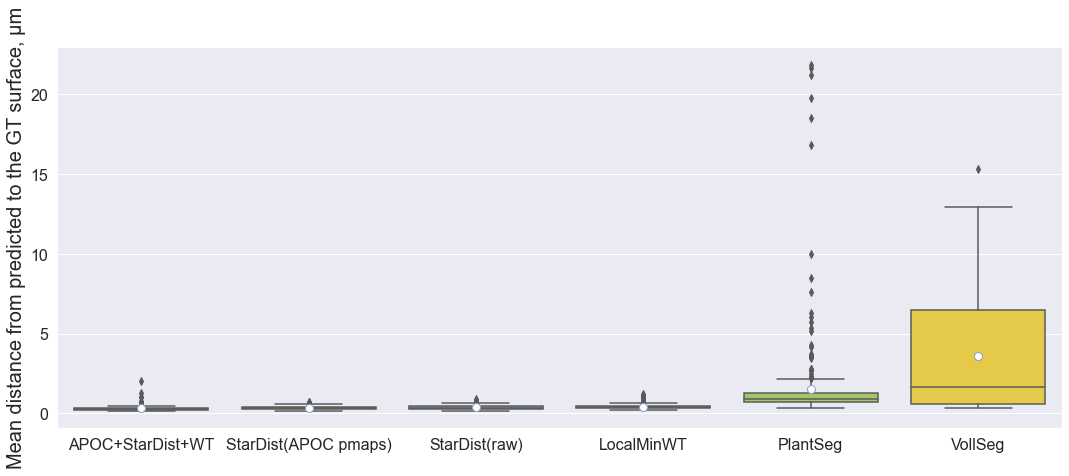

In [114]:
f, ax = plt.subplots(1, figsize = (18,7))

sns.boxplot(data=[metrics_star_wt_surf["avrg_d_from_pred_to_gt"], 
                  metrics_star_apoc_surf["avrg_d_from_pred_to_gt"], 
                  metrics_star_surf["avrg_d_from_pred_to_gt"],  
                  metrics_wt_surf["avrg_d_from_pred_to_gt"], 
                  metrics_plant_surf["avrg_d_from_pred_to_gt"],
                  metrics_voll_surf["avrg_d_from_pred_to_gt"]], 
            showmeans=True, ax = ax,meanprops={"marker":"o",# 
                                               "markerfacecolor":"white", 
                                               "markersize":"8"})

plt.xticks(plt.xticks()[0], ["APOC+StarDist+WT", "StarDist(APOC pmaps)", "StarDist(raw)",   "LocalMinWT", "PlantSeg", "VollSeg"])
plt.ylabel("Mean distance from predicted to the GT surface, μm")

plt.savefig(os.path.join(module_path, "reports", "figures", "comparison_of_all", "avrg_d_from_pred_to_gt.png"), bbox_inches='tight')

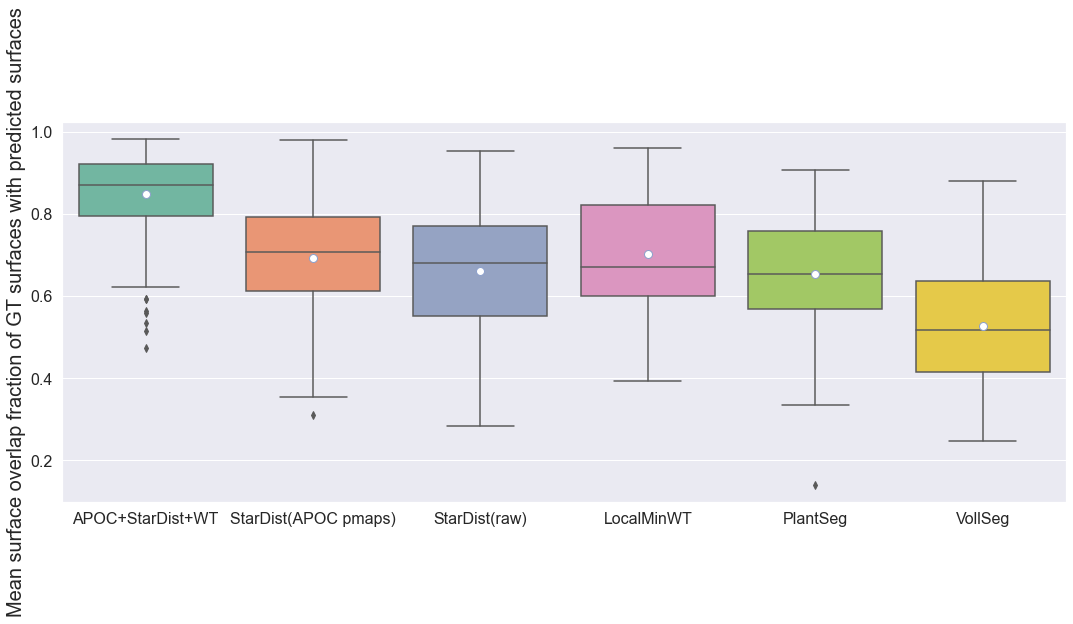

In [113]:
f, ax = plt.subplots(1, figsize = (18,7))

sns.boxplot(data=[metrics_star_wt_surf["surf_overlap_of_gt_surf_w_pred_surf"], 
                  metrics_star_apoc_surf["surf_overlap_of_gt_surf_w_pred_surf"], 
                  metrics_star_surf["surf_overlap_of_gt_surf_w_pred_surf"],  
                  metrics_wt_surf["surf_overlap_of_gt_surf_w_pred_surf"], 
                  metrics_plant_surf["surf_overlap_of_gt_surf_w_pred_surf"],
                  metrics_voll_surf["surf_overlap_of_gt_surf_w_pred_surf"]], 
            showmeans=True, ax = ax,meanprops={"marker":"o",
                                               "markerfacecolor":"white", 
                                               "markersize":"8"})

plt.xticks(plt.xticks()[0], ["APOC+StarDist+WT", "StarDist(APOC pmaps)", "StarDist(raw)",   "LocalMinWT", "PlantSeg", "VollSeg"])
plt.ylabel("Mean surface overlap fraction of GT surfaces with predicted surfaces")

plt.savefig(os.path.join(module_path, "reports", "figures", "comparison_of_all", "surf_overlap_of_gt_surf_w_pred_surf.png"), bbox_inches='tight')

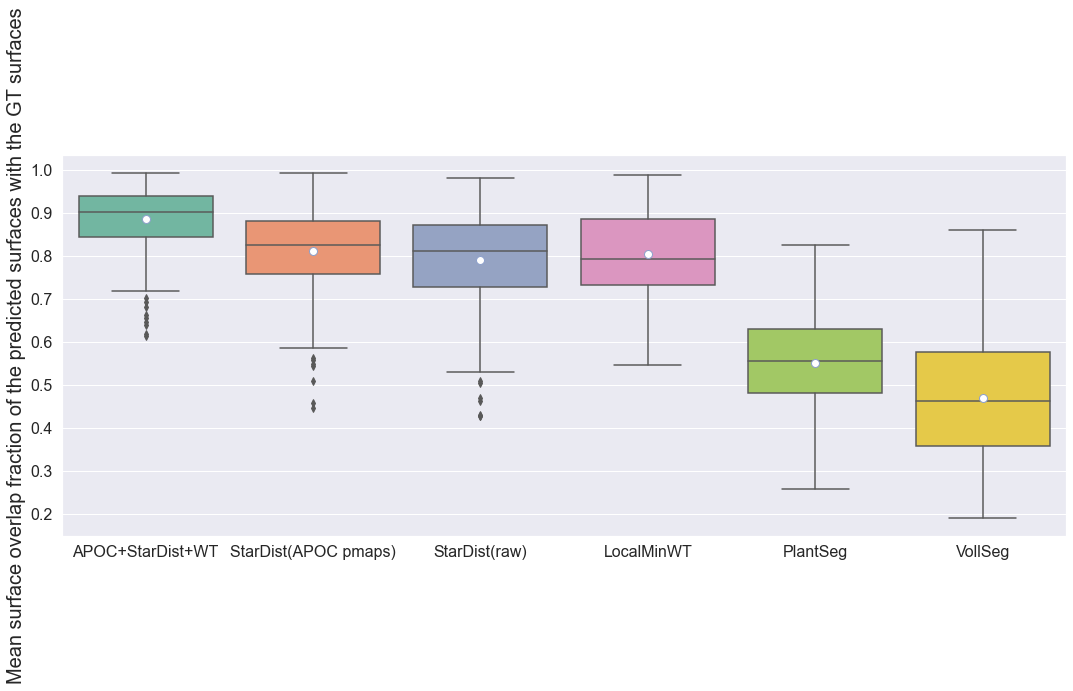

In [112]:
f, ax = plt.subplots(1, figsize = (18,7))

sns.boxplot(data=[metrics_star_wt_surf["surf_overlap_of_pred_surf_w_gt_surf"], 
                  metrics_star_apoc_surf["surf_overlap_of_pred_surf_w_gt_surf"], 
                  metrics_star_surf["surf_overlap_of_pred_surf_w_gt_surf"],  
                  metrics_wt_surf["surf_overlap_of_pred_surf_w_gt_surf"], 
                  metrics_plant_surf["surf_overlap_of_pred_surf_w_gt_surf"],
                  metrics_voll_surf["surf_overlap_of_pred_surf_w_gt_surf"]], 
            showmeans=True, ax = ax,meanprops={"marker":"o",
                                               "markerfacecolor":"white", 
                                               "markersize":"8"})

plt.xticks(plt.xticks()[0], ["APOC+StarDist+WT", "StarDist(APOC pmaps)", "StarDist(raw)",   "LocalMinWT", "PlantSeg", "VollSeg"])
plt.ylabel("Mean surface overlap fraction of the predicted surfaces with the GT surfaces")

plt.savefig(os.path.join(module_path, "reports", "figures", "comparison_of_all", "surf_overlap_of_pred_surf_w_gt_surf.png"), bbox_inches='tight')

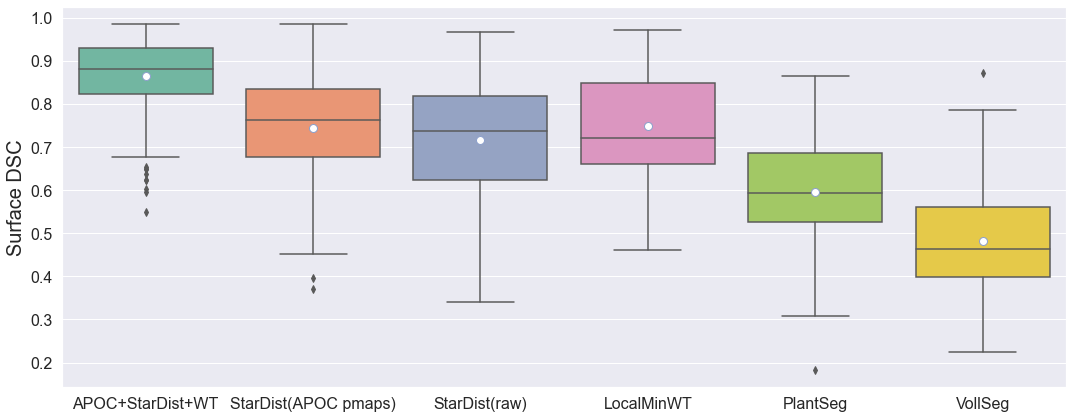

In [111]:
f, ax = plt.subplots(1, figsize = (18,7))

sns.boxplot(data=[metrics_star_wt_surf["DSCsurf"], 
                  metrics_star_apoc_surf["DSCsurf"],
                  metrics_star_surf["DSCsurf"],  
                  metrics_wt_surf["DSCsurf"], 
                  metrics_plant_surf["DSCsurf"],
                  metrics_voll_surf["DSCsurf"]], 
            showmeans=True, ax = ax,meanprops={"marker":"o",# 
                                               "markerfacecolor":"white", 
                                               "markersize":"8"})

plt.xticks(plt.xticks()[0], ["APOC+StarDist+WT", "StarDist(APOC pmaps)", "StarDist(raw)",   "LocalMinWT", "PlantSeg", "VollSeg"])
plt.ylabel("Surface DSC")

plt.savefig(os.path.join(module_path, "reports", "figures", "comparison_of_all", "DSCsurf.png"), bbox_inches='tight')

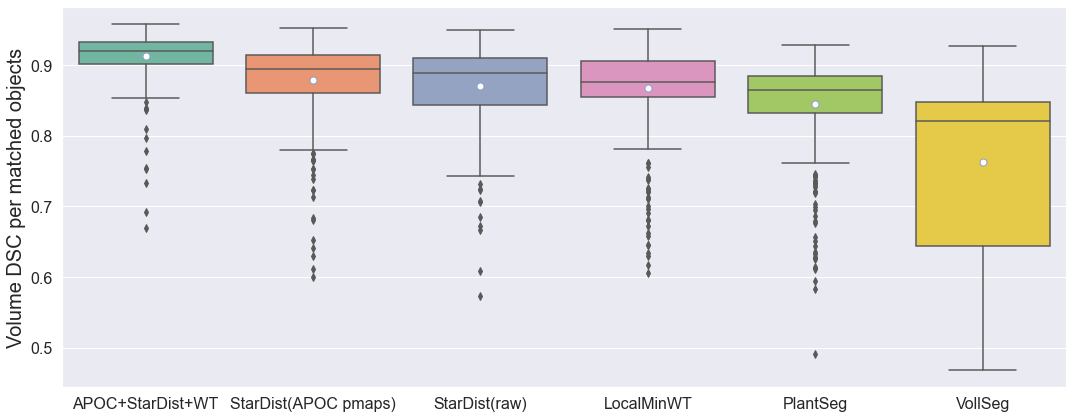

In [110]:
f, ax = plt.subplots(1, figsize = (18,7))

sns.boxplot(data=[metrics_star_wt_surf["DSCvol"], 
                  metrics_star_apoc_surf["DSCvol"], 
                  metrics_star_surf["DSCvol"],  
                  metrics_wt_surf["DSCvol"], 
                  metrics_plant_surf["DSCvol"],
                  metrics_voll_surf["DSCvol"]], 
            showmeans=True, ax = ax,meanprops={"marker":"o",# 
                                               "markerfacecolor":"white", 
                                               "markersize":"7"})

plt.xticks(plt.xticks()[0], ["APOC+StarDist+WT", "StarDist(APOC pmaps)", "StarDist(raw)",   "LocalMinWT", "PlantSeg", "VollSeg"])
plt.ylabel("Volume DSC per matched objects")

plt.savefig(os.path.join(module_path, "reports", "figures", "comparison_of_all", "DSCvol.png"), bbox_inches='tight')